In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cvr-weather-station/CVR_-_Weather_Station_Data_2023_03_30.xlsx


In [2]:

dataset = pd.read_excel('/kaggle/input/cvr-weather-station/CVR_-_Weather_Station_Data_2023_03_30.xlsx')

dataset = dataset.drop(['par','tsr', 'illumination', 'wind_direction'],axis =1 )
dataset.head()

,time,hum,tem,rain_gauge,pressure,co2,wind_speed,pm2_5,pm10,wind_direction_angle
0,2023-03-30T21:11:47.579,90.1,28.7,0.0,950.3,541.0,0.5,49.0,62.0,132.8
1,2023-03-30T21:06:47.454,90.5,28.7,0.0,950.3,546.0,0.6,48.0,62.0,132.8
2,2023-03-30T21:01:46.910,90.5,28.7,0.0,950.2,558.0,0.7,48.0,62.0,132.8
3,2023-03-30T20:56:55.579,90.4,28.9,0.0,950.2,551.0,0.6,50.0,64.0,132.8
4,2023-03-30T20:51:47.589,90.1,29.0,0.0,950.1,543.0,0.7,47.0,58.0,132.8


In [3]:
dataset['date'] = 0
dataset['time_only'] = 0

In [4]:
temp = []
for i in range(0,49143):
    temp = dataset['time'][i].split('T', 2)
    dataset['date'][i] = temp[0]
    dataset['time_only'][i] = temp[1]
    temp = []
dataset.head()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,time,hum,tem,rain_gauge,pressure,co2,wind_speed,pm2_5,pm10,wind_direction_angle,date,time_only
0,2023-03-30T21:11:47.579,90.1,28.7,0.0,950.3,541.0,0.5,49.0,62.0,132.8,2023-03-30,21:11:47.579
1,2023-03-30T21:06:47.454,90.5,28.7,0.0,950.3,546.0,0.6,48.0,62.0,132.8,2023-03-30,21:06:47.454
2,2023-03-30T21:01:46.910,90.5,28.7,0.0,950.2,558.0,0.7,48.0,62.0,132.8,2023-03-30,21:01:46.910
3,2023-03-30T20:56:55.579,90.4,28.9,0.0,950.2,551.0,0.6,50.0,64.0,132.8,2023-03-30,20:56:55.579
4,2023-03-30T20:51:47.589,90.1,29.0,0.0,950.1,543.0,0.7,47.0,58.0,132.8,2023-03-30,20:51:47.589


In [5]:
dataset = dataset.drop(['time'], axis = 1)

In [6]:
dataset.shape

(49143, 11)

In [7]:
dataset.tail()

,hum,tem,rain_gauge,pressure,co2,wind_speed,pm2_5,pm10,wind_direction_angle,date,time_only
49138,69.4,30.0,4.8,946.6,492.0,2.1,14.0,17.0,261.9,2022-09-03,18:20:44.303
49139,67.8,30.3,4.8,946.5,498.0,2.0,15.0,19.0,258.6,2022-09-03,18:15:44.297
49140,65.2,31.1,4.8,946.4,512.0,0.0,18.0,23.0,237.5,2022-09-03,18:10:42.610
49141,61.3,32.5,4.8,946.3,526.0,0.1,17.0,22.0,252.8,2022-09-03,18:05:44.315
49142,60.0,32.9,4.8,946.1,529.0,0.7,15.0,19.0,312.0,2022-09-03,18:00:44.219


In [8]:
dataset.head()

,hum,tem,rain_gauge,pressure,co2,wind_speed,pm2_5,pm10,wind_direction_angle,date,time_only
0,90.1,28.7,0.0,950.3,541.0,0.5,49.0,62.0,132.8,2023-03-30,21:11:47.579
1,90.5,28.7,0.0,950.3,546.0,0.6,48.0,62.0,132.8,2023-03-30,21:06:47.454
2,90.5,28.7,0.0,950.2,558.0,0.7,48.0,62.0,132.8,2023-03-30,21:01:46.910
3,90.4,28.9,0.0,950.2,551.0,0.6,50.0,64.0,132.8,2023-03-30,20:56:55.579
4,90.1,29.0,0.0,950.1,543.0,0.7,47.0,58.0,132.8,2023-03-30,20:51:47.589


In [9]:
temp = []
dataset['year'] = 0
dataset['month'] = 0
dataset['day'] = 0
for i in range(0, 49143):
    temp = dataset['date'][i].split('-', 3)
    dataset['year'][i] = temp[0]
    dataset['month'][i] = temp[1]
    dataset['day'][i] = temp[2]
    temp = []
dataset.head()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


,hum,tem,rain_gauge,pressure,co2,wind_speed,pm2_5,pm10,wind_direction_angle,date,time_only,year,month,day
0,90.1,28.7,0.0,950.3,541.0,0.5,49.0,62.0,132.8,2023-03-30,21:11:47.579,2023,3,30
1,90.5,28.7,0.0,950.3,546.0,0.6,48.0,62.0,132.8,2023-03-30,21:06:47.454,2023,3,30
2,90.5,28.7,0.0,950.2,558.0,0.7,48.0,62.0,132.8,2023-03-30,21:01:46.910,2023,3,30
3,90.4,28.9,0.0,950.2,551.0,0.6,50.0,64.0,132.8,2023-03-30,20:56:55.579,2023,3,30
4,90.1,29.0,0.0,950.1,543.0,0.7,47.0,58.0,132.8,2023-03-30,20:51:47.589,2023,3,30


In [10]:
dataset = dataset.drop(['date'],axis = 1)

In [11]:
dataset.head()

,hum,tem,rain_gauge,pressure,co2,wind_speed,pm2_5,pm10,wind_direction_angle,time_only,year,month,day
0,90.1,28.7,0.0,950.3,541.0,0.5,49.0,62.0,132.8,21:11:47.579,2023,3,30
1,90.5,28.7,0.0,950.3,546.0,0.6,48.0,62.0,132.8,21:06:47.454,2023,3,30
2,90.5,28.7,0.0,950.2,558.0,0.7,48.0,62.0,132.8,21:01:46.910,2023,3,30
3,90.4,28.9,0.0,950.2,551.0,0.6,50.0,64.0,132.8,20:56:55.579,2023,3,30
4,90.1,29.0,0.0,950.1,543.0,0.7,47.0,58.0,132.8,20:51:47.589,2023,3,30


In [12]:
temp = []
dataset['hour'] = 0
dataset['minute'] = 0
dataset['seconds'] = 0
for i in range(0, 49143):
    temp = dataset['time_only'][i].split(':', 3)
    dataset['hour'][i] = temp[0]
    dataset['minute'][i] = temp[1]
    dataset['seconds'][i] = temp[2]
    temp = []
dataset.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: S

,hum,tem,rain_gauge,pressure,co2,wind_speed,pm2_5,pm10,wind_direction_angle,time_only,year,month,day,hour,minute,seconds
0,90.1,28.7,0.0,950.3,541.0,0.5,49.0,62.0,132.8,21:11:47.579,2023,3,30,21,11,47.579
1,90.5,28.7,0.0,950.3,546.0,0.6,48.0,62.0,132.8,21:06:47.454,2023,3,30,21,6,47.454
2,90.5,28.7,0.0,950.2,558.0,0.7,48.0,62.0,132.8,21:01:46.910,2023,3,30,21,1,46.910
3,90.4,28.9,0.0,950.2,551.0,0.6,50.0,64.0,132.8,20:56:55.579,2023,3,30,20,56,55.579
4,90.1,29.0,0.0,950.1,543.0,0.7,47.0,58.0,132.8,20:51:47.589,2023,3,30,20,51,47.589


In [13]:
dataset.drop(['seconds'], axis = 1)

,hum,tem,rain_gauge,pressure,co2,wind_speed,pm2_5,pm10,wind_direction_angle,time_only,year,month,day,hour,minute
0,90.1,28.7,0.0,950.3,541.0,0.5,49.0,62.0,132.8,21:11:47.579,2023,3,30,21,11
1,90.5,28.7,0.0,950.3,546.0,0.6,48.0,62.0,132.8,21:06:47.454,2023,3,30,21,6
2,90.5,28.7,0.0,950.2,558.0,0.7,48.0,62.0,132.8,21:01:46.910,2023,3,30,21,1
3,90.4,28.9,0.0,950.2,551.0,0.6,50.0,64.0,132.8,20:56:55.579,2023,3,30,20,56
4,90.1,29.0,0.0,950.1,543.0,0.7,47.0,58.0,132.8,20:51:47.589,2023,3,30,20,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49138,69.4,30.0,4.8,946.6,492.0,2.1,14.0,17.0,261.9,18:20:44.303,2022,9,3,18,20
49139,67.8,30.3,4.8,946.5,498.0,2.0,15.0,19.0,258.6,18:15:44.297,2022,9,3,18,15
49140,65.2,31.1,4.8,946.4,512.0,0.0,18.0,23.0,237.5,18:10:42.610,2022,9,3,18,10
49141,61.3,32.5,4.8,946.3,526.0,0.1,17.0,22.0,252.8,18:05:44.315,2022,9,3,18,5


In [14]:
dataset

,hum,tem,rain_gauge,pressure,co2,wind_speed,pm2_5,pm10,wind_direction_angle,time_only,year,month,day,hour,minute,seconds
0,90.1,28.7,0.0,950.3,541.0,0.5,49.0,62.0,132.8,21:11:47.579,2023,3,30,21,11,47.579
1,90.5,28.7,0.0,950.3,546.0,0.6,48.0,62.0,132.8,21:06:47.454,2023,3,30,21,6,47.454
2,90.5,28.7,0.0,950.2,558.0,0.7,48.0,62.0,132.8,21:01:46.910,2023,3,30,21,1,46.910
3,90.4,28.9,0.0,950.2,551.0,0.6,50.0,64.0,132.8,20:56:55.579,2023,3,30,20,56,55.579
4,90.1,29.0,0.0,950.1,543.0,0.7,47.0,58.0,132.8,20:51:47.589,2023,3,30,20,51,47.589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49138,69.4,30.0,4.8,946.6,492.0,2.1,14.0,17.0,261.9,18:20:44.303,2022,9,3,18,20,44.303
49139,67.8,30.3,4.8,946.5,498.0,2.0,15.0,19.0,258.6,18:15:44.297,2022,9,3,18,15,44.297
49140,65.2,31.1,4.8,946.4,512.0,0.0,18.0,23.0,237.5,18:10:42.610,2022,9,3,18,10,42.610
49141,61.3,32.5,4.8,946.3,526.0,0.1,17.0,22.0,252.8,18:05:44.315,2022,9,3,18,5,44.315


In [15]:
dataset['pm10'].isnull().sum()

2

In [16]:
dataset_pm2_5 = dataset['pm2_5'].isnull().dropna()
dataset_pm2_5

0        False
1        False
2        False
3        False
4        False
         ...  
49138    False
49139    False
49140    False
49141    False
49142    False
Name: pm2_5, Length: 49143, dtype: bool

In [17]:
dataset.dropna()

,hum,tem,rain_gauge,pressure,co2,wind_speed,pm2_5,pm10,wind_direction_angle,time_only,year,month,day,hour,minute,seconds
0,90.1,28.7,0.0,950.3,541.0,0.5,49.0,62.0,132.8,21:11:47.579,2023,3,30,21,11,47.579
1,90.5,28.7,0.0,950.3,546.0,0.6,48.0,62.0,132.8,21:06:47.454,2023,3,30,21,6,47.454
2,90.5,28.7,0.0,950.2,558.0,0.7,48.0,62.0,132.8,21:01:46.910,2023,3,30,21,1,46.910
3,90.4,28.9,0.0,950.2,551.0,0.6,50.0,64.0,132.8,20:56:55.579,2023,3,30,20,56,55.579
4,90.1,29.0,0.0,950.1,543.0,0.7,47.0,58.0,132.8,20:51:47.589,2023,3,30,20,51,47.589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49138,69.4,30.0,4.8,946.6,492.0,2.1,14.0,17.0,261.9,18:20:44.303,2022,9,3,18,20,44.303
49139,67.8,30.3,4.8,946.5,498.0,2.0,15.0,19.0,258.6,18:15:44.297,2022,9,3,18,15,44.297
49140,65.2,31.1,4.8,946.4,512.0,0.0,18.0,23.0,237.5,18:10:42.610,2022,9,3,18,10,42.610
49141,61.3,32.5,4.8,946.3,526.0,0.1,17.0,22.0,252.8,18:05:44.315,2022,9,3,18,5,44.315


In [18]:
x = dataset['pm2_5'].mean()

In [19]:
for i in range(0,3595):
    if dataset_pm2_5[i] :
        dataset['pm2_5'][i] = x

In [20]:
dataset['pm2_5']

0        49.0
1        48.0
2        48.0
3        50.0
4        47.0
         ... 
49138    14.0
49139    15.0
49140    18.0
49141    17.0
49142    15.0
Name: pm2_5, Length: 49143, dtype: float64

In [21]:
dataset = dataset[dataset['pm2_5'].notnull()]

In [22]:
dataset = dataset.dropna()
dataset.isnull().sum()

hum                     0
tem                     0
rain_gauge              0
pressure                0
co2                     0
wind_speed              0
pm2_5                   0
pm10                    0
wind_direction_angle    0
time_only               0
year                    0
month                   0
day                     0
hour                    0
minute                  0
seconds                 0
dtype: int64

In [23]:
total_day_25 = 0
total_day_10 = 0
counter = 0
averages_day_25 = []
averages_day_10 = []
temp = int(dataset['day'][0])
for i in range(0,30595):
    if i==13519 or i == 13549:
        pass
    elif temp == int(dataset['day'][i]):
        total_day_25 += int(dataset['pm2_5'][i])
        total_day_10 += int(dataset['pm10'][i])
        counter += 1
    else:
        temp =  int(dataset['day'][i])
        avg_25 = total_day_25/counter
        avg_10 = total_day_10/counter
        averages_day_25.append(avg_25)
        total_day_25 = 0
        averages_day_10.append(avg_10)
        total_day_10 = 0
        counter = 1
    

In [24]:

averages_day_25 = np.array(averages_day_25).T

In [25]:
print(averages_day_25)

[134.59493671  60.63799283  75.85964912 102.81454545  76.34875445
 159.93238434  64.49637681  84.84341637  40.35714286  72.61805556
 406.9738806  144.10810811 299.8583691  659.64575646 222.29078014
 116.25090909  48.96753247 105.59340659  52.20689655  75.44067797
  80.34453782 161.30875576  52.40425532  48.34782609  51.
  73.375      207.58333333  88.95620438  66.88546256  35.
  50.50543478  52.37799043  71.75        47.76923077 119.20979021
 347.48594378 155.35820896 108.04240283  97.97916667 268.73519164
  66.9020979   44.22996516  50.86785714  80.69395018 131.54861111
 277.23928571 198.78472222  64.13194444 221.2238806  230.82374101
 203.64930556 204.7173913  252.33461538 243.56597222 245.24825175
 126.375      323.88967972 267.61921708 103.9754386  158.26690391
 192.51567944  92.59375     85.42335766  88.8744186   65.31914894
 236.16014235 113.45104895  92.42160279 101.60069444  94.95138889
  62.3125      59.55797101  55.17708333  78.66319444  70.94444444
  71.45519713  64.10175439

averages_day_10 = np.array(averages_day_10)[np.newaxis]

In [26]:

averages_day_10 = np.array(averages_day_10).T

In [27]:
df = pd.DataFrame([averages_day_25, averages_day_10]).transpose()

In [28]:
df.columns = ['pm25_avg', 'pm10_avg']

In [29]:
df.head(100)

,pm25_avg,pm10_avg
0,134.594937,150.219409
1,60.637993,77.114695
2,75.859649,93.733333
3,102.814545,118.538182
4,76.348754,91.224199
...,...,...
95,139.213523,176.612100
96,113.503571,146.775000
97,113.967972,146.964413
98,118.489362,152.588652


In [30]:
def calc_index_25(Cp):
    if Cp>0 and Cp<=30:
        ip = (50/30)*Cp
    elif Cp>30 and Cp<=60:
        bphi = 60
        bplo = 31
        ihi = 100
        ilo = 51
        ip = (((ihi-ilo)/(bphi-bplo))*(Cp-bplo))+ilo
    elif Cp>60 and Cp<=90:
        bphi = 90
        bplo = 61
        ihi = 200
        ilo = 101
        ip = (((ihi-ilo)/(bphi-bplo))*(Cp-bplo))+ilo
    elif Cp>90 and Cp<=120:
        bphi = 120
        bplo = 91
        ihi = 300
        ilo = 201
        ip = (((ihi-ilo)/(bphi-bplo))*(Cp-bplo))+ilo
    elif Cp>120 and Cp<=250:
        bphi = 250
        bplo = 121
        ihi = 400
        ilo = 301
        ip = (((ihi-ilo)/(bphi-bplo))*(Cp-bplo))+ilo
    else:
        ip = 401
    return ip
        

In [31]:
def calc_index_10(Cp):
    if Cp>0 and Cp<=50:
        ip = Cp
    elif Cp>50 and Cp<=100:
        bphi = 100
        bplo = 51
        ihi = 100
        ilo = 51
        ip = (((ihi-ilo)/(bphi-bplo))*(Cp-bplo))+ilo
    elif Cp>100 and Cp<=250:
        bphi = 250
        bplo = 101
        ihi = 200
        ilo = 101
        ip = (((ihi-ilo)/(bphi-bplo))*(Cp-bplo))+ilo
    elif Cp>250 and Cp<=350:
        bphi = 350
        bplo = 251
        ihi = 300
        ilo = 201
        ip = (((ihi-ilo)/(bphi-bplo))*(Cp-bplo))+ilo
    elif Cp>350 and Cp<=430:
        bphi = 430
        bplo = 351
        ihi = 400
        ilo = 301
        ip = (((ihi-ilo)/(bphi-bplo))*(Cp-bplo))+ilo
    else:
        ip = 401
    return ip

In [32]:
print(calc_index_25(20))

33.333333333333336


In [33]:
aqi_25 = []
aqi_10 = []
for i in range(0, 120):
    store_25 = calc_index_25(df['pm25_avg'][i])
    store_10 = calc_index_10(df['pm10_avg'][i])
    aqi_25.append(store_25)
    aqi_10.append(store_10)
    

In [34]:
aqi_day = []
for i in range(0,120):
    if aqi_25[i] > aqi_10[i]:
        aqi_day.append(aqi_25[i])
    else:
        aqi_day.append(aqi_10[i])

In [35]:
results = pd.DataFrame([aqi_25, aqi_10, aqi_day]).transpose()

In [36]:
results.columns = ['aqi_25','aqi_10', 'aqi_day']

In [37]:
print(results)

         aqi_25      aqi_10     aqi_day
0    311.433324  133.702829  311.433324
1     99.764182   77.114695   99.764182
2    151.727768   93.733333  151.727768
3    241.332414  112.652886  241.332414
4    153.397472   91.224199  153.397472
..          ...         ...         ...
115  306.148661  143.688896  306.148661
116  264.724138  128.020134  264.724138
117  368.429434  219.656489  368.429434
118  305.367490  142.501468  305.367490
119  199.149589  110.737085  199.149589

[120 rows x 3 columns]


In [38]:
import seaborn as sns


<AxesSubplot:>

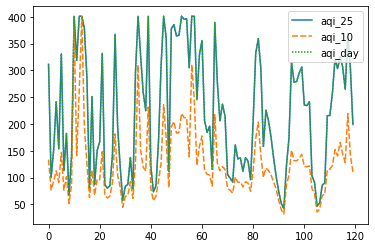

In [39]:
sns.lineplot(data = results)